**Bước 0:Cài đặt thư viện và import**
- pip install pandas
- pip install numpy
- pip install matplotlib
- pip install scikit-learn (sklearn)
- pip install pickle (nếu lỗi version thì pip install pickle5)
- pip install yfinance (data về chứng khoán)

In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Bước 1: Đọc DATA và khám phá dữ liệu (Công ty Microsoft)**

In [42]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'MSFT'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2024-06-14')

[*********************100%***********************]  1 of 1 completed


In [43]:
stock_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2003-10-20 00:00:00+00:00,18.220602,29.350000,29.370001,28.799999,28.950001,38794500
2003-10-21 00:00:00+00:00,18.220602,29.350000,29.430000,29.170000,29.350000,44166800
2003-10-22 00:00:00+00:00,17.935034,28.889999,29.209999,28.799999,29.030001,48798500
2003-10-23 00:00:00+00:00,17.947451,28.910000,29.080000,28.100000,28.719999,67357900
2003-10-24 00:00:00+00:00,16.519600,26.610001,27.400000,26.420000,27.270000,210558300
...,...,...,...,...,...,...
2024-06-07 00:00:00+00:00,422.242249,423.850006,426.279999,423.000000,426.200012,13621700
2024-06-10 00:00:00+00:00,426.246979,427.869995,428.079987,423.890015,424.700012,14003000


In [44]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5198 entries, 2003-10-20 00:00:00+00:00 to 2024-06-13 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  5198 non-null   float64
 1   (Close, MSFT)      5198 non-null   float64
 2   (High, MSFT)       5198 non-null   float64
 3   (Low, MSFT)        5198 non-null   float64
 4   (Open, MSFT)       5198 non-null   float64
 5   (Volume, MSFT)     5198 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 284.3 KB


In [45]:
# Những feature của tập dữ liệu
stock_data.keys()

MultiIndex([('Adj Close', 'MSFT'),
            (    'Close', 'MSFT'),
            (     'High', 'MSFT'),
            (      'Low', 'MSFT'),
            (     'Open', 'MSFT'),
            (   'Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [46]:
# Thống kê mô tả về tập dữ liệu
description = stock_data.describe()
mode = stock_data.select_dtypes(include=["number"]).mode().iloc[0]
mode.name = "mode"
median = stock_data.select_dtypes(include=["number"]).median()
median.name = "median"
description = description._append(mode)
description = description._append(median)
description

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
count,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5.198000e+03
mean,88.518182,95.106374,95.997336,94.130358,95.076826,4.627537e+07
std,105.081965,104.439792,105.396940,103.355335,104.406748,2.874569e+07
min,11.220716,15.150000,15.620000,14.870000,15.200000,7.425600e+06
25%,19.959704,27.290001,27.500000,27.100000,27.290001,2.615438e+07
50%,31.800920,37.895000,38.190001,37.605000,37.910000,3.951800e+07
75%,114.445562,120.904997,121.632502,120.302502,121.164999,5.869108e+07
max,439.904999,441.579987,443.399994,439.369995,440.850006,5.910522e+08
mode,16.202993,27.250000,26.000000,27.000000,27.010000,2.057000e+07


**Bước 2: Kiểm tra và tiền xử lý dữ liệu(nếu có)**

In [47]:
stock_data.shape
# kích thước dữ liệu

(5198, 6)

In [48]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

,,0
Price,Ticker,
Adj Close,MSFT,float64
Close,MSFT,float64
High,MSFT,float64
Low,MSFT,float64
Open,MSFT,float64
Volume,MSFT,int64


In [49]:
stock_data.isnull().sum()
#check missing value

,,0
Price,Ticker,
Adj Close,MSFT,0
Close,MSFT,0
High,MSFT,0
Low,MSFT,0
Open,MSFT,0
Volume,MSFT,0


**Ta thấy tập dữ liệu này khá là sạch**

**Vẽ biểu đồ phân tích**

1. Vẽ biểu đồ cột

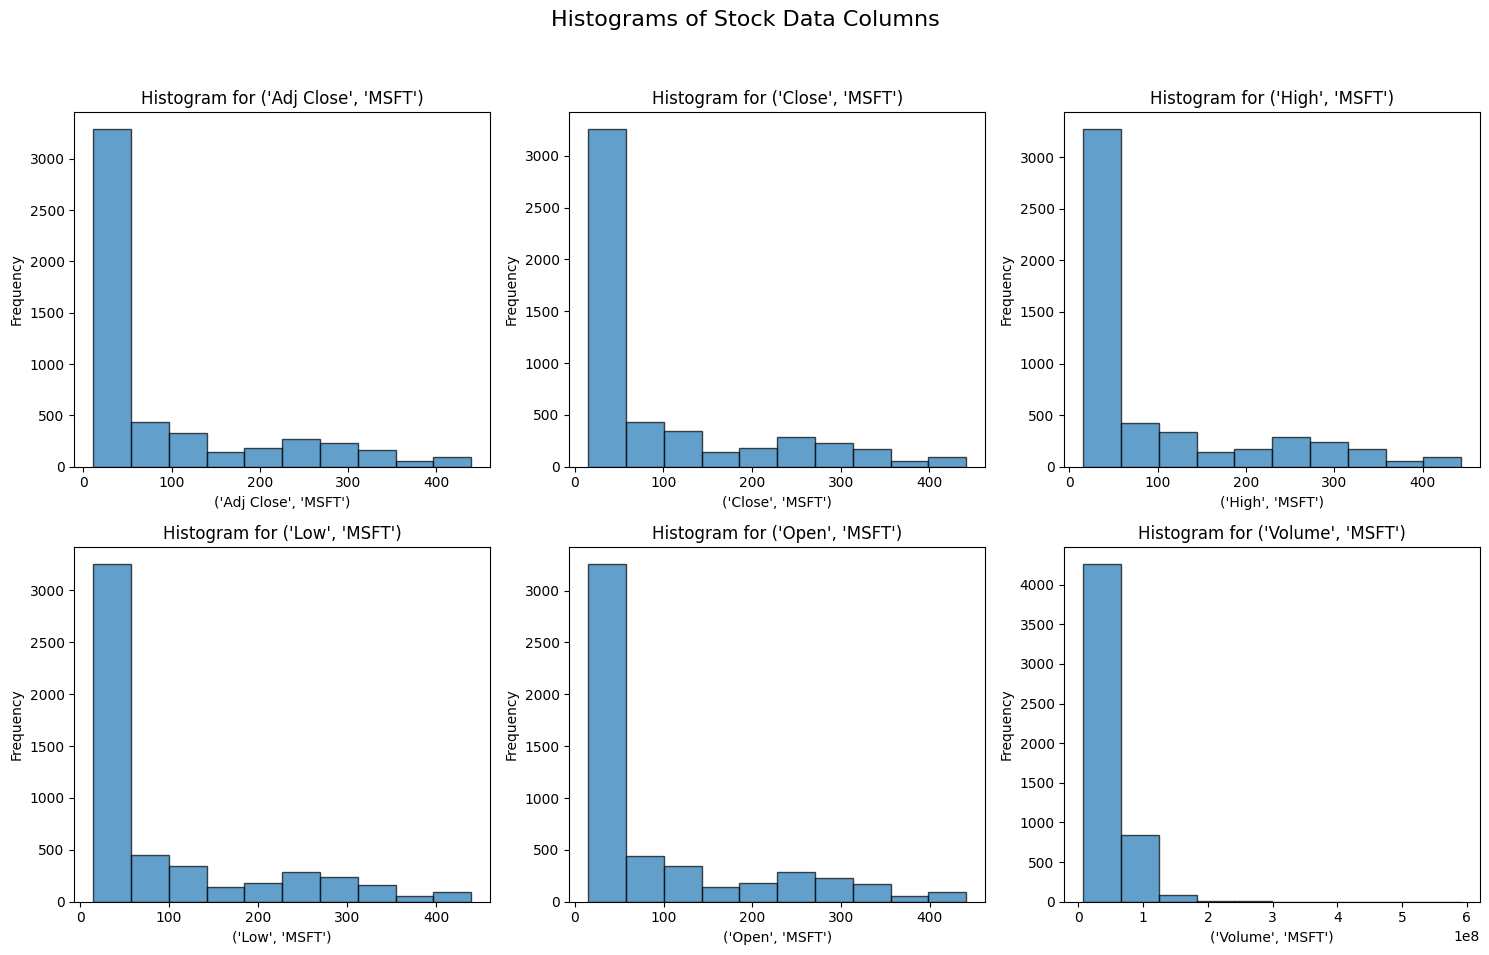

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Histograms of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ histogram
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].hist(stock_data[column], bins=10, edgecolor='k', alpha=0.7)
    axs[row, col].set_title(f'Histogram for {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()

2. Biểu đồ hộp

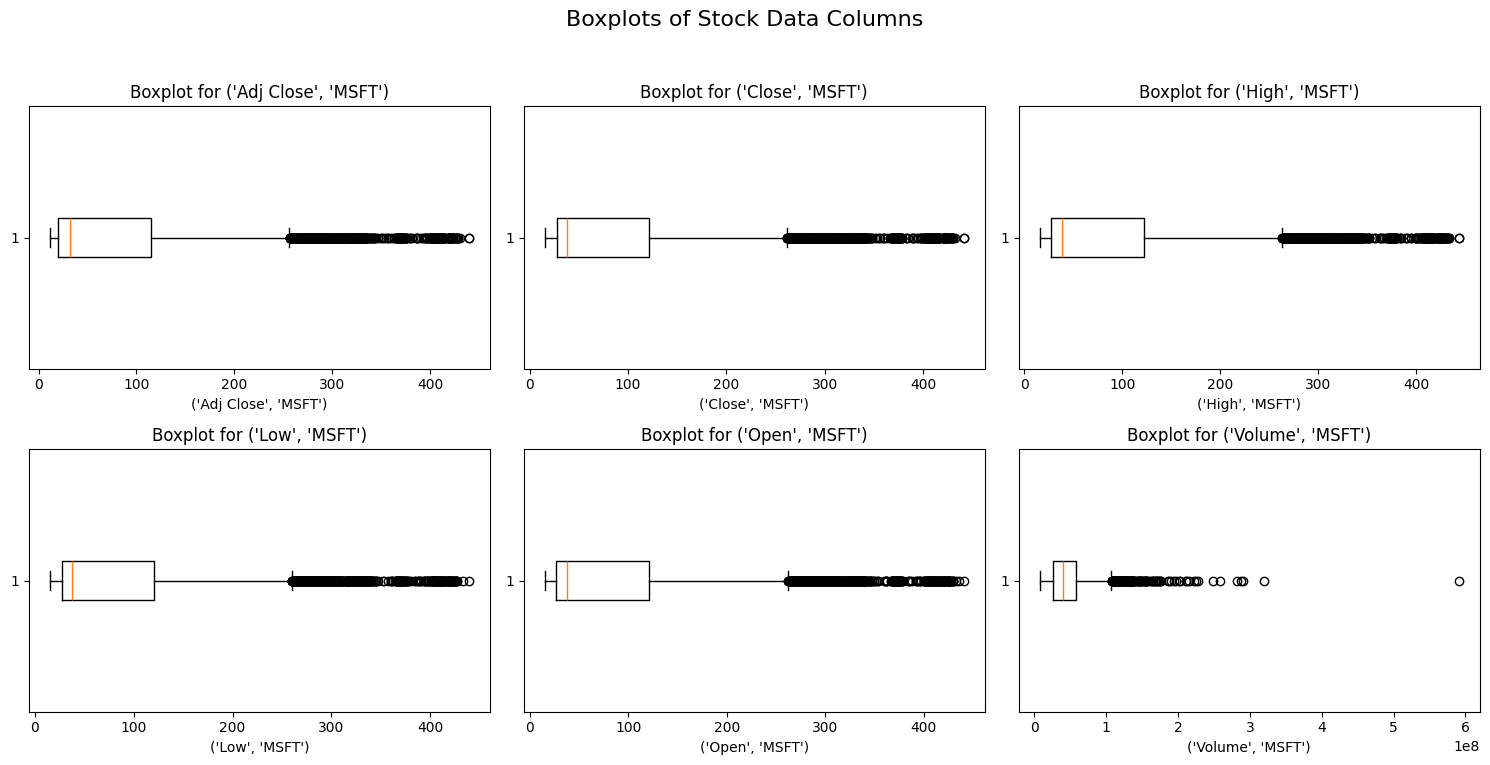

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Boxplots of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ boxplot
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].boxplot(stock_data[column], vert=False)
    axs[row, col].set_title(f'Boxplot for {column}')
    axs[row, col].set_xlabel(column)

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()

3. Biểu đồ Heatmap

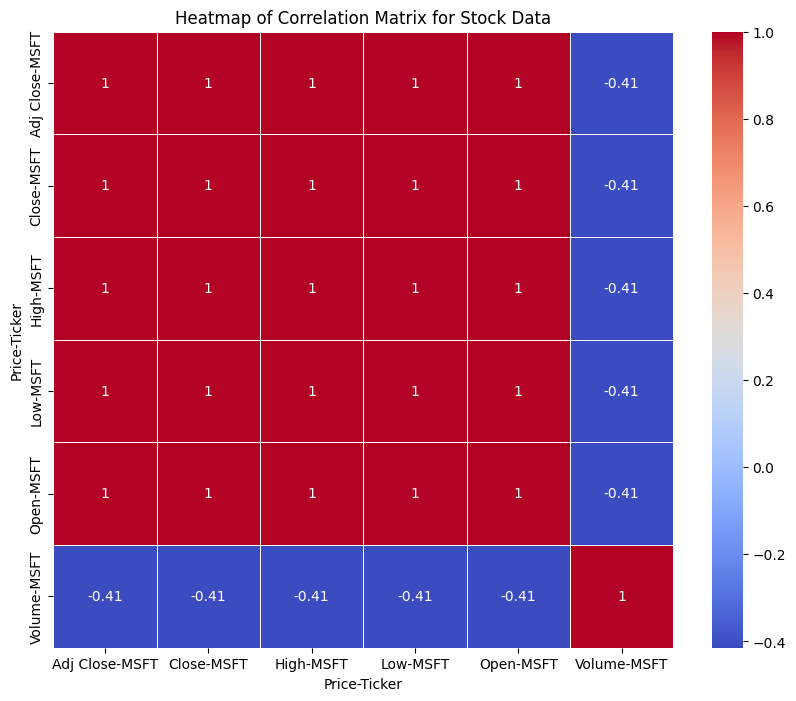

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()

4. Biểu đồ scatter

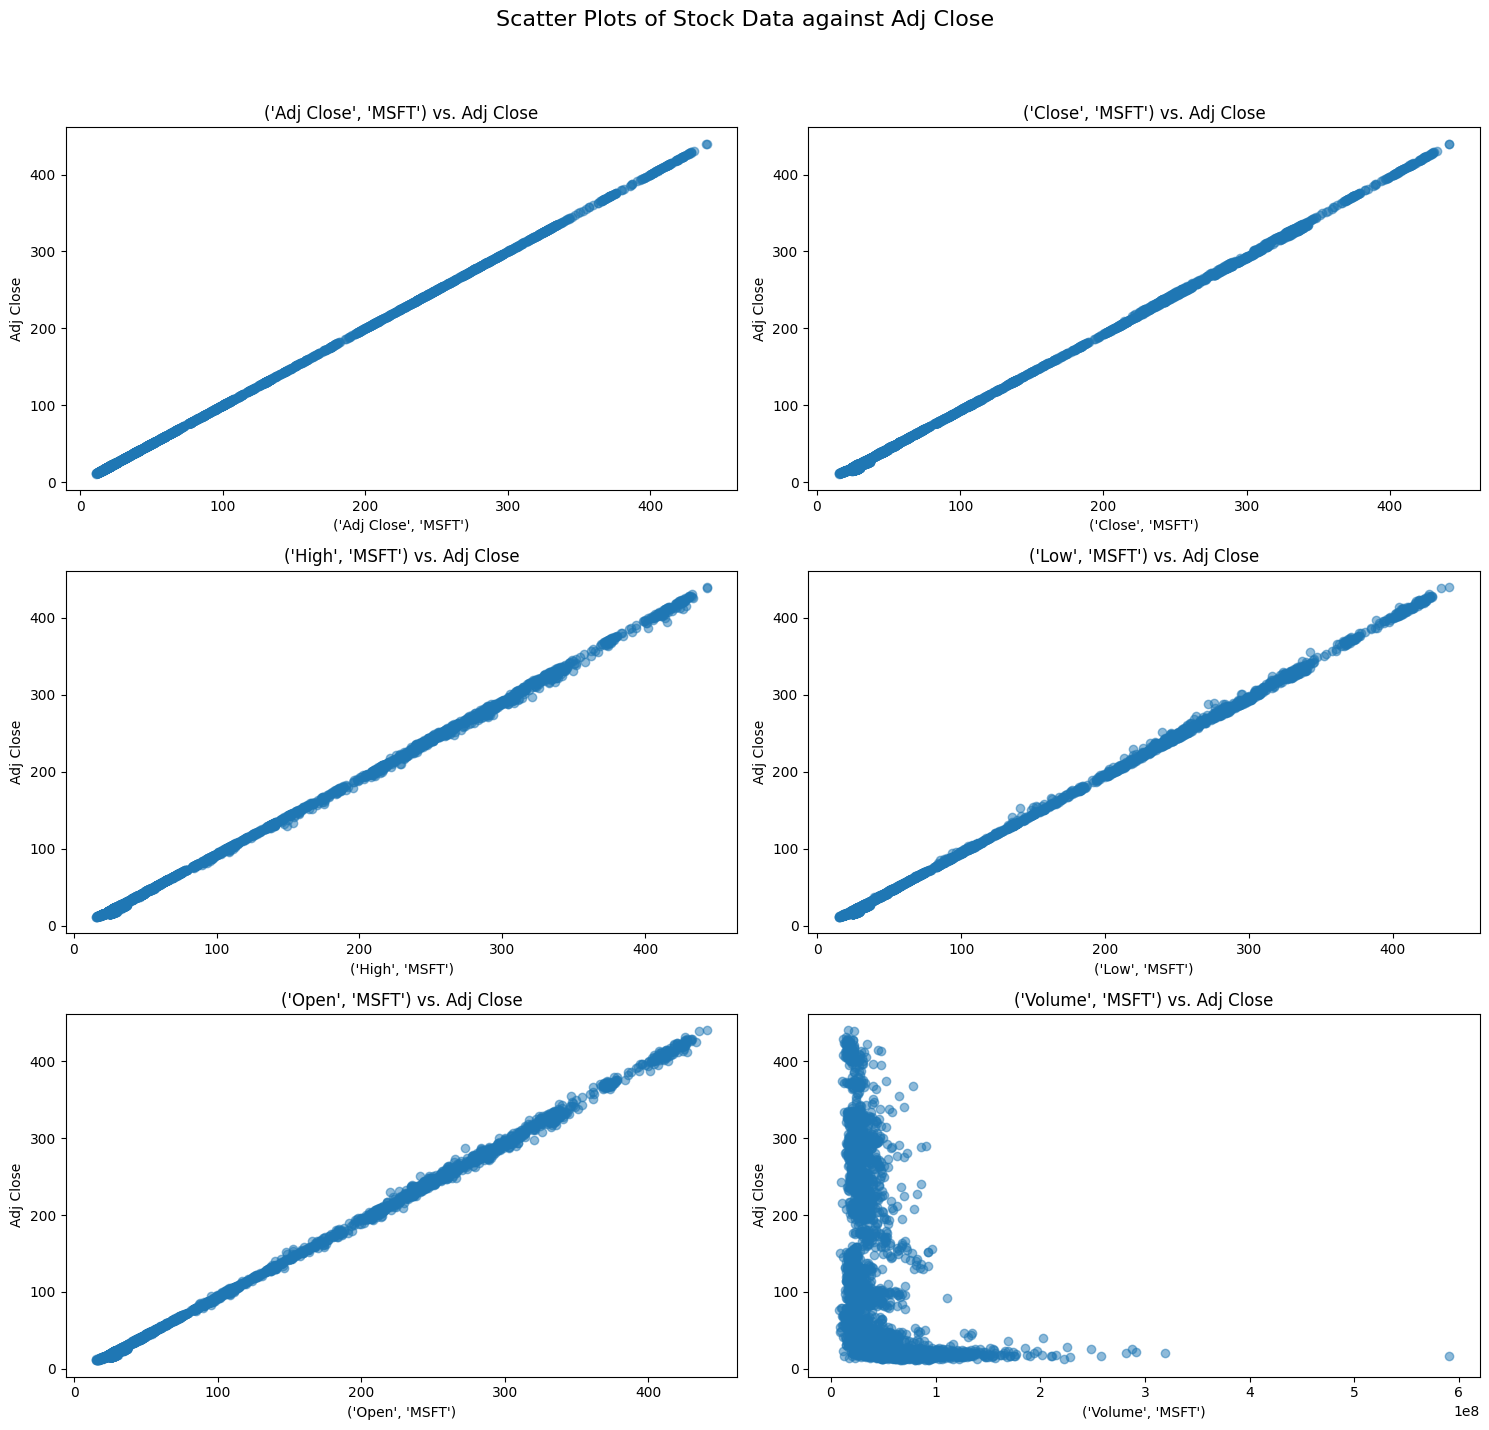

In [53]:
# Tính toán số lượng cột và số lượng hàng dựa vào số cột trong DataFrame
num_cols = len(stock_data.columns)
num_rows = (num_cols + 1) // 2  # Số hàng làm tròn lên nếu có số lẻ cột

# Tạo subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle('Scatter Plots of Stock Data against Adj Close', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ scatter
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 2)
    axs[row, col].scatter(stock_data[column], stock_data['Adj Close'], alpha=0.5)
    axs[row, col].set_title(f'{column} vs. Adj Close')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Adj Close')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Thông qua biểu đồ heatmap và biểu đồ scatter, ta thấy sự phụ thuộc tuyến tính giữa cột Adj close với các cột Open, Hight, Low, Close.
Vì thế nên ta sẽ chia tập X, Y như sau:

In [54]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (Y)
Y = stock_data['Adj Close']
Y

Ticker,MSFT
Date,
2003-10-20 00:00:00+00:00,18.220602
2003-10-21 00:00:00+00:00,18.220602
2003-10-22 00:00:00+00:00,17.935034
2003-10-23 00:00:00+00:00,17.947451
2003-10-24 00:00:00+00:00,16.519600
...,...
2024-06-07 00:00:00+00:00,422.242249
2024-06-10 00:00:00+00:00,426.246979
2024-06-11 00:00:00+00:00,431.038727


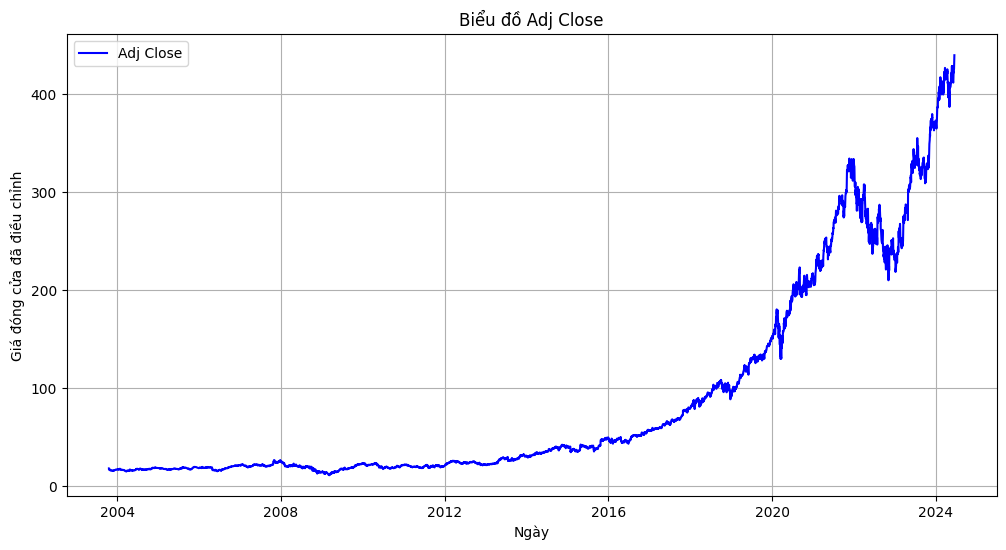

In [55]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, Y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Chọn các cột trừ cột 'Adj Close' và 'Volume làm biến độc lập (X)
X = stock_data.drop(columns=['Adj Close','Volume'])
X

Price,Close,High,Low,Open
Ticker,MSFT,MSFT,MSFT,MSFT
Date,,,,
2003-10-20 00:00:00+00:00,29.350000,29.370001,28.799999,28.950001
2003-10-21 00:00:00+00:00,29.350000,29.430000,29.170000,29.350000
2003-10-22 00:00:00+00:00,28.889999,29.209999,28.799999,29.030001
2003-10-23 00:00:00+00:00,28.910000,29.080000,28.100000,28.719999
2003-10-24 00:00:00+00:00,26.610001,27.400000,26.420000,27.270000
...,...,...,...,...
2024-06-07 00:00:00+00:00,423.850006,426.279999,423.000000,426.200012
2024-06-10 00:00:00+00:00,427.869995,428.079987,423.890015,424.700012


Thay vì sử dụng chỉ số (index) là số thứ tự thì ta sẽ dùng ngày tháng. Do không ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự.

In [57]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [58]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

X_train:  (4158, 4)
X_test:  (1040, 4)
Y_train:  (4158, 1)
Y_test:  (1040, 1)


In [59]:
X_train

Price,Close,High,Low,Open
Ticker,MSFT,MSFT,MSFT,MSFT
Date,,,,
2011-10-04 00:00:00+00:00,25.340000,25.389999,24.260000,24.299999
2018-06-21 00:00:00+00:00,101.139999,102.459999,100.879997,102.080002
2017-04-27 00:00:00+00:00,68.269997,68.379997,67.580002,68.150002
2018-03-26 00:00:00+00:00,93.779999,94.000000,90.400002,90.610001
2004-12-03 00:00:00+00:00,27.230000,27.440001,27.139999,27.160000
...,...,...,...,...
2005-08-25 00:00:00+00:00,27.030001,27.090000,26.850000,26.900000
2016-02-02 00:00:00+00:00,53.000000,54.259998,52.650002,54.169998


In [60]:
X_test

Price,Close,High,Low,Open
Ticker,MSFT,MSFT,MSFT,MSFT
Date,,,,
2009-02-06 00:00:00+00:00,19.660000,19.930000,19.059999,19.160000
2004-02-12 00:00:00+00:00,26.950001,27.150000,26.930000,27.090000
2016-09-27 00:00:00+00:00,57.950001,58.060001,56.680000,56.930000
2010-03-09 00:00:00+00:00,28.799999,29.110001,28.549999,28.559999
2022-03-17 00:00:00+00:00,295.220001,295.609985,289.369995,293.290009
...,...,...,...,...
2008-06-20 00:00:00+00:00,28.230000,28.920000,28.100000,28.900000
2007-06-27 00:00:00+00:00,29.870001,29.950001,29.360001,29.360001


In [61]:
Y_train

Ticker,MSFT
Date,
2011-10-04 00:00:00+00:00,19.842489
2018-06-21 00:00:00+00:00,94.555458
2017-04-27 00:00:00+00:00,62.246422
2018-03-26 00:00:00+00:00,87.296234
2004-12-03 00:00:00+00:00,18.896326
...,...
2005-08-25 00:00:00+00:00,18.931087
2016-02-02 00:00:00+00:00,46.749695
2018-10-12 00:00:00+00:00,102.830826


In [62]:
Y_test

Ticker,MSFT
Date,
2009-02-06 00:00:00+00:00,14.461855
2004-02-12 00:00:00+00:00,16.730673
2016-09-27 00:00:00+00:00,52.166164
2010-03-09 00:00:00+00:00,21.783443
2022-03-17 00:00:00+00:00,288.351959
...,...
2008-06-20 00:00:00+00:00,20.544258
2007-06-27 00:00:00+00:00,21.428003
2013-09-09 00:00:00+00:00,26.262457


Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)

In [63]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("/content/drive/MyDrive/PhanVanKiet_Scaler/Scaler_Microsoft.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)

In [64]:
X_train, X_train.shape

(array([[0.02389607, 0.02283884, 0.02212014, 0.02137907],
        [0.20165092, 0.20300154, 0.20261484, 0.20411136],
        [0.12456909, 0.12333442, 0.12416962, 0.12439798],
        ...,
        [0.2214197 , 0.22352611, 0.2173145 , 0.22039234],
        [0.95879751, 0.95483658, 0.94565369, 0.945871  ],
        [0.03076707, 0.03022582, 0.03095406, 0.03129332]]),
 (4158, 4))

In [65]:
X_test, X_test.shape

(array([[0.01057618, 0.01007527, 0.00987043, 0.00930342],
        [0.0276716 , 0.02695311, 0.0284099 , 0.02793375],
        [0.10036818, 0.09920988, 0.09849235, 0.09803829],
        ...,
        [0.03871679, 0.03779981, 0.03846879, 0.03763655],
        [0.02814061, 0.02739726, 0.02859835, 0.0281217 ],
        [0.46598506, 0.46432746, 0.45698469, 0.45668975]]),
 (1040, 4))

**Bước 3: Huấn luyện mô hình**

In [66]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, Y_train) # fit chính là hàm đào tạo

LinearRegression()

**Bước 4: Đánh giá mô hình**

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [68]:
Y_pred = model.predict(X_test) #dự báo Y_pred dựa trên tập X_test
Y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(Y_test, Y_pred, Y_train, Y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    r2_train = r2_score(Y_train, Y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [69]:
Y_pred.shape

(1040, 1)

In [70]:
Y_test.shape

(1040, 1)

In [71]:
rate(Y_test, Y_pred, Y_train, Y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 2.1652108257118647
R-squared (R2) Score: 0.9998050627375509
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 2.2511723107094737
R-squared (R2) Score: 0.9997909214502448


In [72]:
print(Y_test)

Ticker                           MSFT
Date                                 
2009-02-06 00:00:00+00:00   14.461855
2004-02-12 00:00:00+00:00   16.730673
2016-09-27 00:00:00+00:00   52.166164
2010-03-09 00:00:00+00:00   21.783443
2022-03-17 00:00:00+00:00  288.351959
...                               ...
2008-06-20 00:00:00+00:00   20.544258
2007-06-27 00:00:00+00:00   21.428003
2013-09-09 00:00:00+00:00   26.262457
2003-12-23 00:00:00+00:00   16.854832
2020-11-24 00:00:00+00:00  206.720947

[1040 rows x 1 columns]


In [73]:
print(Y_pred)

[[ 12.60821405]
 [ 19.97431614]
 [ 51.13214349]
 ...
 [ 24.69877703]
 [ 20.17086119]
 [207.92153269]]


In [74]:
Y_test = Y_test.values.ravel()  # Hoặc Y_test = Y_test.flatten()
Y_pred = Y_pred.ravel()  # Hoặc Y_pred = Y_pred.flatten()

df_result = pd.DataFrame({'Actual':Y_test, 'Predicted': Y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
0,14.461855,12.608214
1,16.730673,19.974316
2,52.166164,51.132143
3,21.783443,21.822741
4,288.351959,289.804536
5,137.848282,138.342802
6,21.587971,21.116125
7,27.398888,26.079323
8,18.322132,18.814378
9,25.944551,25.716817


<Axes: >

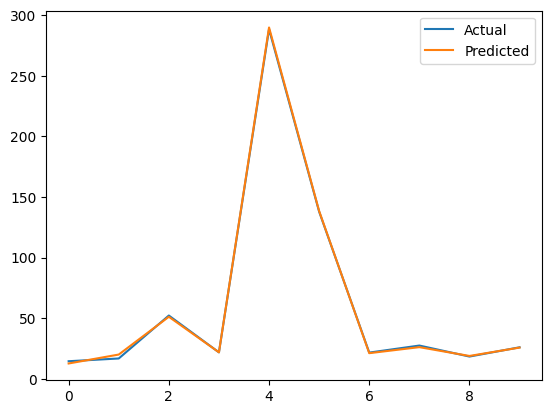

In [75]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

In [76]:
import pickle
# Lưu mô hình vào tệp
with open("/content/drive/MyDrive/PhanVanKiet_Model/Model_Microsoft.pkl", "wb") as model_file:
    pickle.dump(model, model_file)